In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

matplotlib.style.use('ggplot')

In [2]:
csv_data_path = '/Users/sam/All-Program/App-DataSet/HouseClassification/house_metadata_nw.csv'

land_images_path = '/Users/sam/All-Program/App-DataSet/HouseClassification/images/land_images'
house_images_path = '/Users/sam/All-Program/App-DataSet/HouseClassification/images/house_images'

In [3]:
metadata = pd.read_csv(csv_data_path)
print(metadata.shape)
metadata.head()

(259195, 18)


/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,row_id,"removed,",property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
0,0,1,499848,IL,Cook,01-01-100-108-0000,200S HOUGH ST,NaN,BARRINGTON,NaN,Vacant,Land,NaN,NaN,NaN,NaN,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
1,1,0,499849,IL,Cook,01-01-100-109-0000,200S HOUGH ST,NaN,BARRINGTON,NaN,Vacant,Land,NaN,NaN,NaN,NaN,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
2,2,0,499852,IL,Cook,01-01-101-029-0000,201 First,22 # Floor,BARRINGTON,NaN,Vacant,Land,4 Unit Apt Bldg,Frame,NaN,NaN,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
3,3,0,499854,IL,Cook,01-01-109-001-0000,323 MAIN ST,NaN,BARRINGTON,6.00104e+08,Residential,Improved,2 Flat,Frame,2017-05-25 04:42:26.850,NaN,Likely House,http://www.cookcountyassessor.com/PropertyImag...
4,4,0,499855,IL,Cook,01-01-120-001-0000,139W RUSSELL ST,NaN,BARRINGTON,60010,Residential,Improved,NaN,NaN,NaN,NaN,Unknown,http://www.cookcountyassessor.com/PropertyImag...


## DATA TYPE CONVERSION

In [4]:
metadata.columns = ['row_id', 'removed', 'property_id', 'state', 'county_name', 'pin',
       'address_line1', 'address_line2', 'address_city', 'address_zip',
       'zoning', 'improvement_level', 'type', 'exterior',
       'last_reviewed_timestamp', 'gone_timestamp', 'indicator',
       'assessor_photo']
metadata.dtypes

row_id                      int64
removed                     int64
property_id                 int64
state                      object
county_name                object
pin                        object
address_line1              object
address_line2              object
address_city               object
address_zip                object
zoning                     object
improvement_level          object
type                       object
exterior                   object
last_reviewed_timestamp    object
gone_timestamp             object
indicator                  object
assessor_photo             object
dtype: object

In [5]:
metadata['state'] = metadata['state'].astype('str')
metadata['county_name'] = metadata['county_name'].astype('str')
metadata['pin'] = metadata['pin'].astype('str')
metadata['address_line1'] = metadata['address_line1'].astype('str')
metadata['address_line2'] = metadata['address_line2'].astype('str')
metadata['address_city'] = metadata['address_city'].astype('str')
metadata['address_zip'] = metadata['address_zip'].astype('str')
metadata['zoning'] = metadata['zoning'].astype('str')
metadata['improvement_level'] = metadata['improvement_level'].astype('str')
metadata['type'] = metadata['type'].astype('str')
metadata['exterior'] = metadata['exterior'].astype('str')
metadata['last_reviewed_timestamp'] = pd.to_datetime(metadata['last_reviewed_timestamp'])#.astype('str')
metadata['gone_timestamp'] = pd.to_datetime(metadata['gone_timestamp'])#.astype('str')
metadata['indicator'] = metadata['indicator'].astype('str')
metadata['assessor_photo'] = metadata['assessor_photo'].astype('str')
metadata.dtypes

row_id                              int64
removed                             int64
property_id                         int64
state                              object
county_name                        object
pin                                object
address_line1                      object
address_line2                      object
address_city                       object
address_zip                        object
zoning                             object
improvement_level                  object
type                               object
exterior                           object
last_reviewed_timestamp    datetime64[ns]
gone_timestamp             datetime64[ns]
indicator                          object
assessor_photo                     object
dtype: object

## SELECT ONLY TRAINING DATA

In [6]:
metadata = metadata[metadata['removed'] == 0]
print (metadata.shape)
metadata.head()

(220364, 18)


,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
1,1,0,499849,IL,Cook,01-01-100-109-0000,200S HOUGH ST,nan,BARRINGTON,nan,Vacant,Land,nan,nan,NaT,NaT,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
2,2,0,499852,IL,Cook,01-01-101-029-0000,201 First,22 # Floor,BARRINGTON,nan,Vacant,Land,4 Unit Apt Bldg,Frame,NaT,NaT,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
3,3,0,499854,IL,Cook,01-01-109-001-0000,323 MAIN ST,nan,BARRINGTON,600104305.0,Residential,Improved,2 Flat,Frame,2017-05-25 04:42:26.850,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
4,4,0,499855,IL,Cook,01-01-120-001-0000,139W RUSSELL ST,nan,BARRINGTON,60010.0,Residential,Improved,nan,nan,NaT,NaT,Unknown,http://www.cookcountyassessor.com/PropertyImag...
5,5,0,499856,IL,Cook,01-01-120-014-0000,120 COOLIDGE AVE,nan,BARRINGTON,60010.0,Residential,Improved,nan,nan,NaT,NaT,Unknown,http://www.cookcountyassessor.com/PropertyImag...


# ANALYSIS:
------------

## COUNT UNIQUE

In [7]:
print('Unique row_id', len(np.unique(np.array(metadata['row_id']))))
print('Unique removed', len(np.unique(np.array(metadata['removed']))))
print('Unique property_id', len(np.unique(np.array(metadata['property_id']))))
print('Unique state,', len(np.unique(np.array(metadata['state']))))
print('Unique county_name,', len(np.unique(np.array(metadata['county_name']))))
print('Unique property pin', len(np.unique(np.array(metadata['pin']))))
# print('Unique address_zip,', len(np.unique(np.array(metadata['address_zip']))))
print('Unique zoning', len(np.unique(np.array(metadata['zoning']))))
print('Unique improvement_level', len(np.unique(np.array(metadata['improvement_level']))))
# print('Unique type', len(np.unique(np.array(metadata['type']))))
print('Unique exterior', len(np.unique(np.array(metadata['exterior']))))
print('Unique indicator', len(np.unique(np.array(metadata['indicator']))))
# print('Unique assessor_photo', len(np.unique(np.array(metadata['assessor_photo']))))

Unique row_id 220364
Unique removed 1
Unique property_id 220364
Unique state, 1
Unique county_name, 3
Unique property pin 220364
Unique zoning 2
Unique improvement_level 6
Unique exterior 6
Unique indicator 3


# Date Columns: gone_timestamp and last_reviewed_timestamp

In [8]:
# Replace NaT (Not a time) with black value and convert timestamp into date
metadata['gone_timestamp'] = [d.strftime('%Y-%m-%d') if not pd.isnull(d) else '' for d in metadata['gone_timestamp']]
metadata['last_reviewed_timestamp'] = [d.strftime('%Y-%m-%d') if not pd.isnull(d) else '' for d in metadata['last_reviewed_timestamp']]

In [9]:
metadata.head(5)

,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
1,1,0,499849,IL,Cook,01-01-100-109-0000,200S HOUGH ST,nan,BARRINGTON,nan,Vacant,Land,nan,nan,,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
2,2,0,499852,IL,Cook,01-01-101-029-0000,201 First,22 # Floor,BARRINGTON,nan,Vacant,Land,4 Unit Apt Bldg,Frame,,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
3,3,0,499854,IL,Cook,01-01-109-001-0000,323 MAIN ST,nan,BARRINGTON,600104305.0,Residential,Improved,2 Flat,Frame,2017-05-25,,Likely House,http://www.cookcountyassessor.com/PropertyImag...
4,4,0,499855,IL,Cook,01-01-120-001-0000,139W RUSSELL ST,nan,BARRINGTON,60010.0,Residential,Improved,nan,nan,,,Unknown,http://www.cookcountyassessor.com/PropertyImag...
5,5,0,499856,IL,Cook,01-01-120-014-0000,120 COOLIDGE AVE,nan,BARRINGTON,60010.0,Residential,Improved,nan,nan,,,Unknown,http://www.cookcountyassessor.com/PropertyImag...


In [10]:
last_reviewed_timestamp_not_null = metadata[metadata['last_reviewed_timestamp'] != '']
gone_timestamp_not_null = metadata[metadata['gone_timestamp'] != '']
last_reviewed_timestamp_not_null.loc[:,'last_reviewed_timestamp'] = pd.to_datetime(last_reviewed_timestamp_not_null['last_reviewed_timestamp'])
gone_timestamp_not_null.loc[:,'gone_timestamp'] = pd.to_datetime(last_reviewed_timestamp_not_null['gone_timestamp'])

print('last_reviewed_timestamp : max = %s, min = %s' %(str(max(last_reviewed_timestamp_not_null['last_reviewed_timestamp'])), str(min(last_reviewed_timestamp_not_null['last_reviewed_timestamp']))))
print('gone_timestamp : max = %s, min = %s'% (str(max(gone_timestamp_not_null['gone_timestamp'])), str(min(gone_timestamp_not_null['gone_timestamp']))))

/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


last_reviewed_timestamp : max = 2017-12-11 00:00:00, min = 2013-07-14 00:00:00
gone_timestamp : max = 2017-11-09 00:00:00, min = 2013-06-25 00:00:00


In [11]:
last_reviewed_timestamp_not_null.loc[:,'last_reviewed_timestamp_year'] = last_reviewed_timestamp_not_null['last_reviewed_timestamp'].dt.year
last_reviewed_timestamp_not_null.loc[:,'last_reviewed_timestamp_month'] = last_reviewed_timestamp_not_null['last_reviewed_timestamp'].dt.month

gone_timestamp_not_null.loc[:,'gone_timestamp_year'] = gone_timestamp_not_null['gone_timestamp'].dt.year
gone_timestamp_not_null.loc[:,'gone_timestamp_month'] = gone_timestamp_not_null['gone_timestamp'].dt.month

last_reviewed_timestamp_not_null.head()

/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo,last_reviewed_timestamp_year,last_reviewed_timestamp_month
3,3,0,499854,IL,Cook,01-01-109-001-0000,323 MAIN ST,nan,BARRINGTON,600104305.0,Residential,Improved,2 Flat,Frame,2017-05-25,,Likely House,http://www.cookcountyassessor.com/PropertyImag...,2017,5
7,7,0,499858,IL,Cook,01-01-122-010-0000,540 S HOUGH ST,nan,BARRINGTON,60010.0,Residential,Improved,Single Family,Frame,2017-02-22,,Likely House,http://www.cookcountyassessor.com/PropertyImag...,2017,2
12,12,0,499865,IL,Cook,01-01-208-004-0000,215 KAINER AVE,nan,BARRINGTON,600104644.0,Residential,Improved,nan,nan,2016-09-16,,Likely House,http://www.cookcountyassessor.com/PropertyImag...,2016,9
13,13,0,499866,IL,Cook,01-01-211-033-1011,354 EASTERN AVE,nan,BARRINGTON,60010.0,Residential,Condominium,Condo Unit,Brick,2017-02-10,,Likely House,http://www.cookcountyassessor.com/PropertyImag...,2017,2
14,14,0,499867,IL,Cook,01-01-212-038-0000,407 E RUSSELL ST,nan,BARRINGTON,60010.0,Residential,Improved,Single Family,Frame,2017-02-10,,Likely House,http://www.cookcountyassessor.com/PropertyImag...,2017,2


In [12]:
# GROUP based on year and month
last_reviewed_year_grpd = last_reviewed_timestamp_not_null.groupby(last_reviewed_timestamp_not_null['last_reviewed_timestamp_year']).size().rename('count').reset_index()#.value_col.sum()
gone_year_grpd = gone_timestamp_not_null.groupby(gone_timestamp_not_null['gone_timestamp_year']).size().rename('count').reset_index()

##  ======  PLOT last_reviewed_timestamp and gone_timestamp Vs year and month

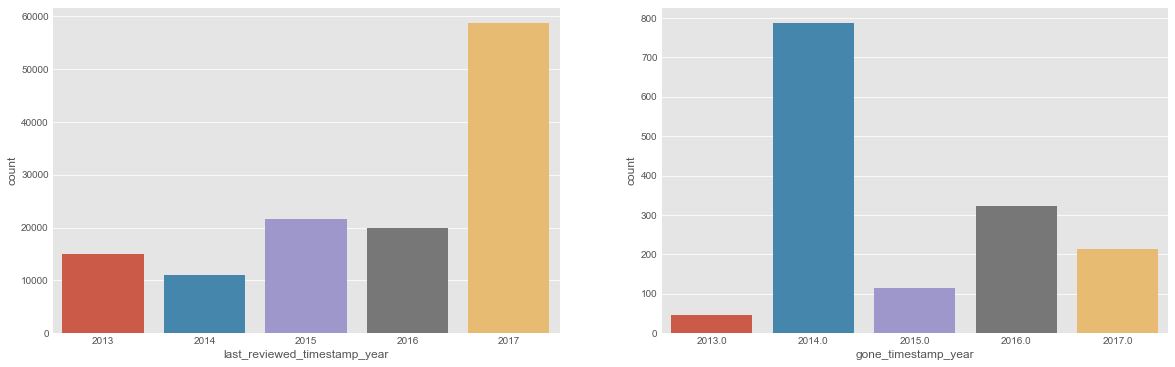

In [13]:
f, axs = plt.subplots(1, 2, figsize=(20,6))
sns.barplot(x="last_reviewed_timestamp_year", y="count", data=last_reviewed_year_grpd, ax = axs[0])
sns.barplot(x="gone_timestamp_year", y="count", data=gone_year_grpd, ax =axs[1])

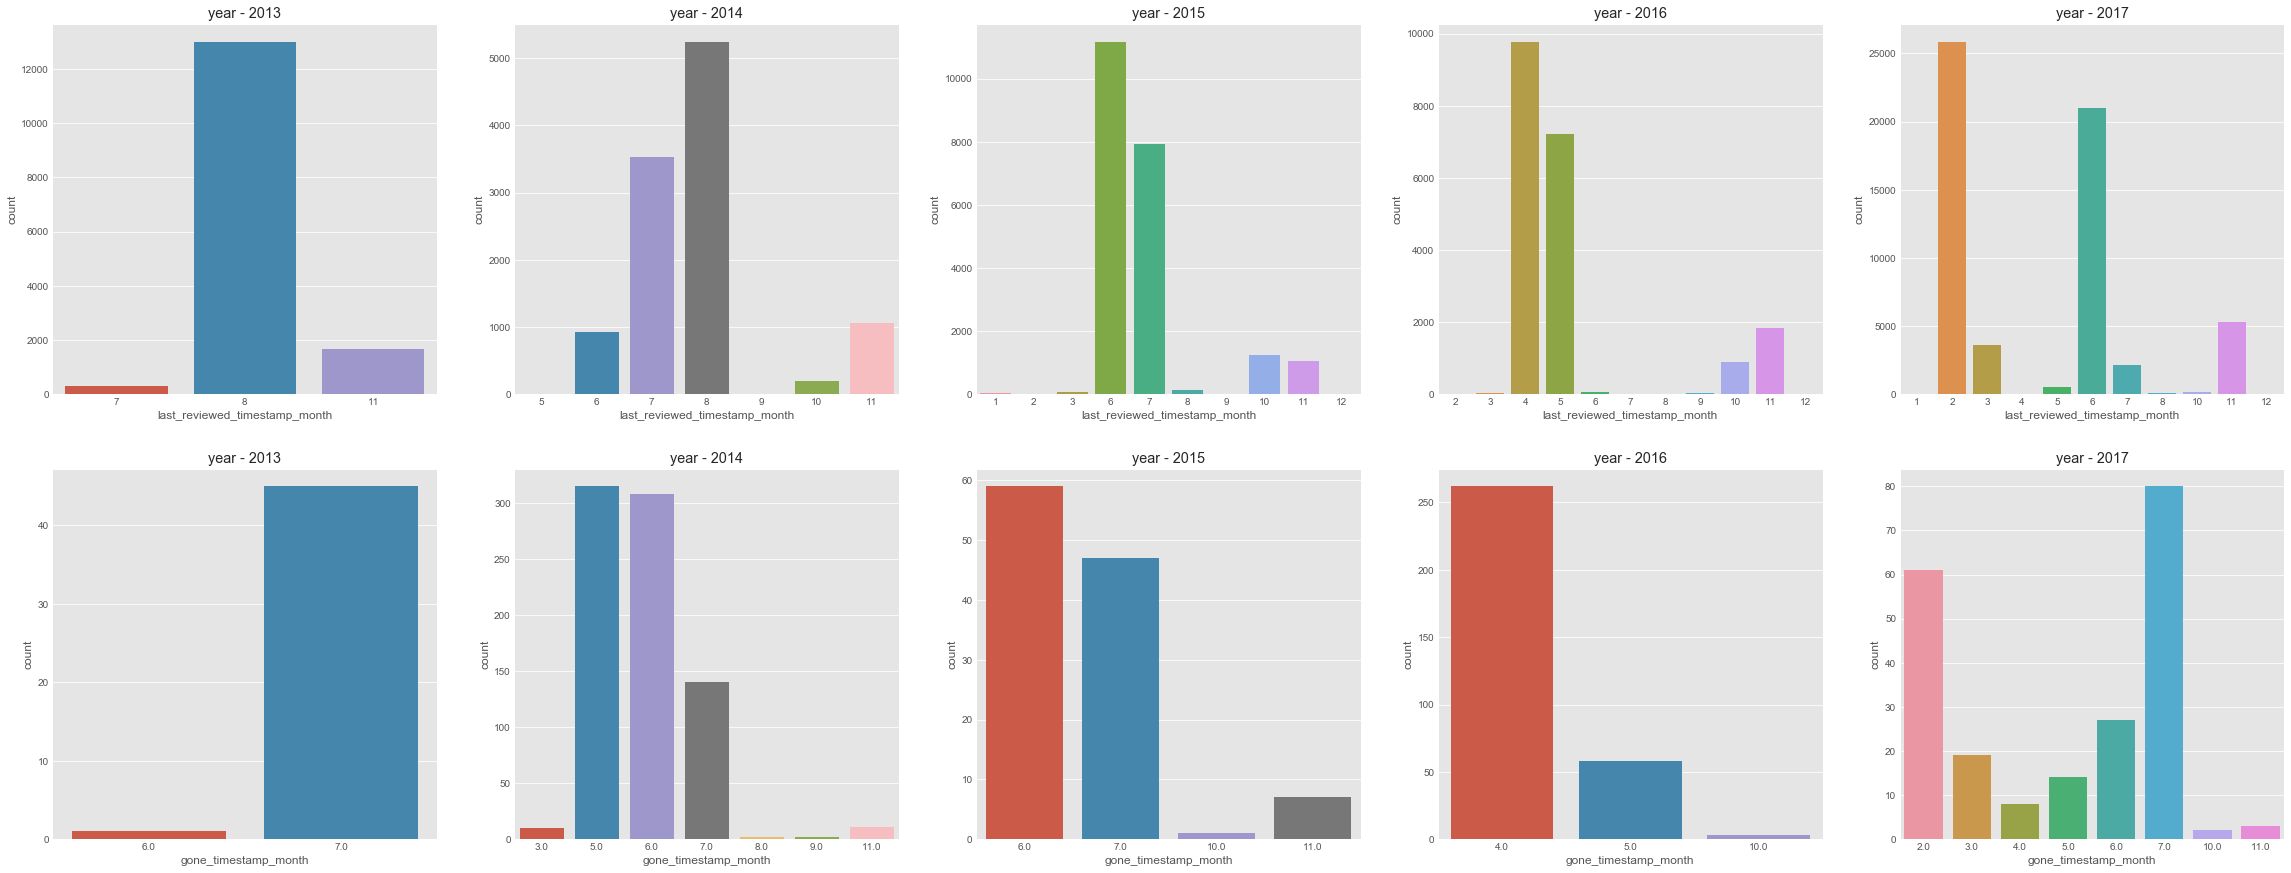

In [14]:
years = [2013, 2014, 2015, 2016, 2017]
f, axs = plt.subplots(2,5,figsize=(40,15))
axs = axs.ravel()

for num, yr in enumerate(years):
    df = last_reviewed_timestamp_not_null[last_reviewed_timestamp_not_null['last_reviewed_timestamp_year'] == yr].groupby(last_reviewed_timestamp_not_null['last_reviewed_timestamp_month']).size().rename('count').reset_index()
    p = sns.barplot(x="last_reviewed_timestamp_month", y="count", data=df, ax =axs[num])
    p.set_title('year - %s'%str(yr))
    
for num, yr in enumerate(years):
    df = gone_timestamp_not_null[gone_timestamp_not_null['gone_timestamp_year'] == yr].groupby(gone_timestamp_not_null['gone_timestamp_month']).size().rename('count').reset_index()
    p = sns.barplot(x="gone_timestamp_month", y="count", data=df, ax =axs[num+5])
    p.set_title('year - %s'%str(yr))

## ====== last_reviewed_timestamp and gone_timestamp Vs indicator

### Theory:

The document says if the gone column has a date then the house is not present anymore. This also means that if any image marked likely land has a house then the image should be changes/removed before sending it to the network.
The below graph would show if the data is correct, the gone_and_indicator should only indicate "Likely Land" values.

Text(0.5,1,'gone_and_indicator')

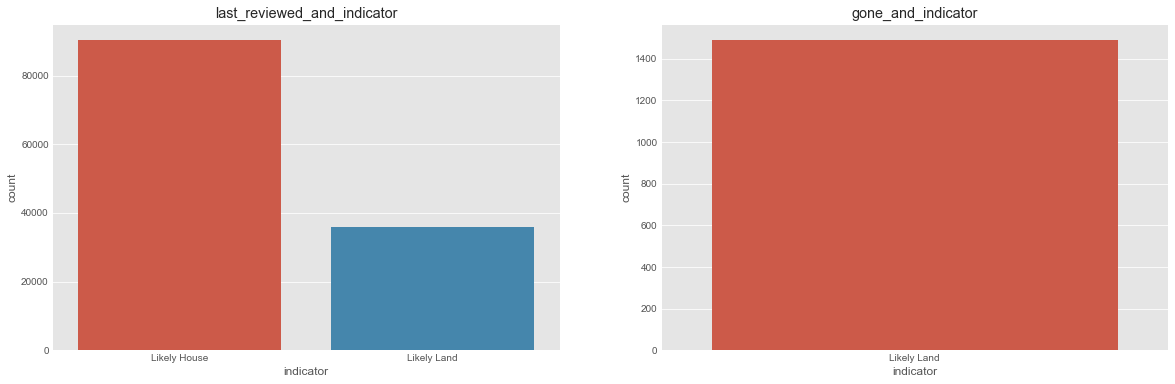

In [15]:
last_reviewed_and_indicator = last_reviewed_timestamp_not_null.groupby(last_reviewed_timestamp_not_null.indicator).size().rename('count').reset_index()
gone_and_indicator = gone_timestamp_not_null.groupby(gone_timestamp_not_null.indicator).size().rename('count').reset_index()

# PLOTS
f, axs = plt.subplots(1, 2, figsize=(20,6))
p1 = sns.barplot(x="indicator", y="count", data=last_reviewed_and_indicator, ax = axs[0])
p1.set_title('last_reviewed_and_indicator')

p2 = sns.barplot(x="indicator", y="count", data=gone_and_indicator, ax =axs[1])
p2.set_title('gone_and_indicator')

## ====== last_reviewed_timestamp and gone_timestamp Vs improvement_level

### Theory: [Failed]
1. In common theory the imrpovement level should all be all Land if the gone_timestamp column has data (GET MORE INFORMATION ABOUT THIS COLUMN)

### TO ASK:

1. The improvement level column has columns = 'condo', 'land', 'improved', 'minor_improvement', 'mixed use' : If we 
have a valid timestamp noted for column "gone_timestamp" then shouldn't all the vallues for the improvement_level be 
"land"



Text(0.5,1,'gone_and_improvement_level')

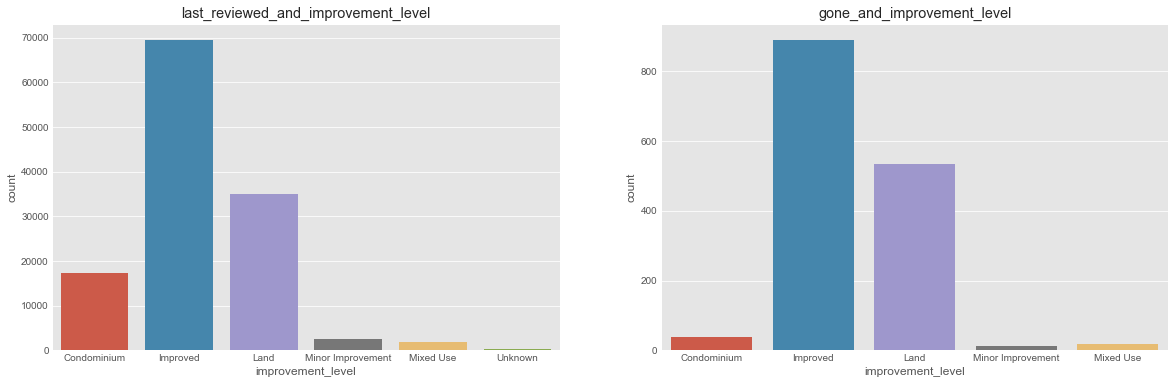

In [16]:
last_reviewed_and_imprv_level = last_reviewed_timestamp_not_null.groupby(last_reviewed_timestamp_not_null['improvement_level']).size().rename('count').reset_index()
gone_and_imprv_level = gone_timestamp_not_null.groupby(gone_timestamp_not_null['improvement_level']).size().rename('count').reset_index()

# Plots
f, axs = plt.subplots(1, 2, figsize=(20,6))
p1 = sns.barplot(x="improvement_level", y="count", data=last_reviewed_and_imprv_level, ax = axs[0])
p1.set_title('last_reviewed_and_improvement_level')

p2 = sns.barplot(x="improvement_level", y="count", data=gone_and_imprv_level, ax =axs[1])
p2.set_title('gone_and_improvement_level')

## ## ====== last_reviewed_timestamp and gone_timestamp (YEAR) Vs improvement_level

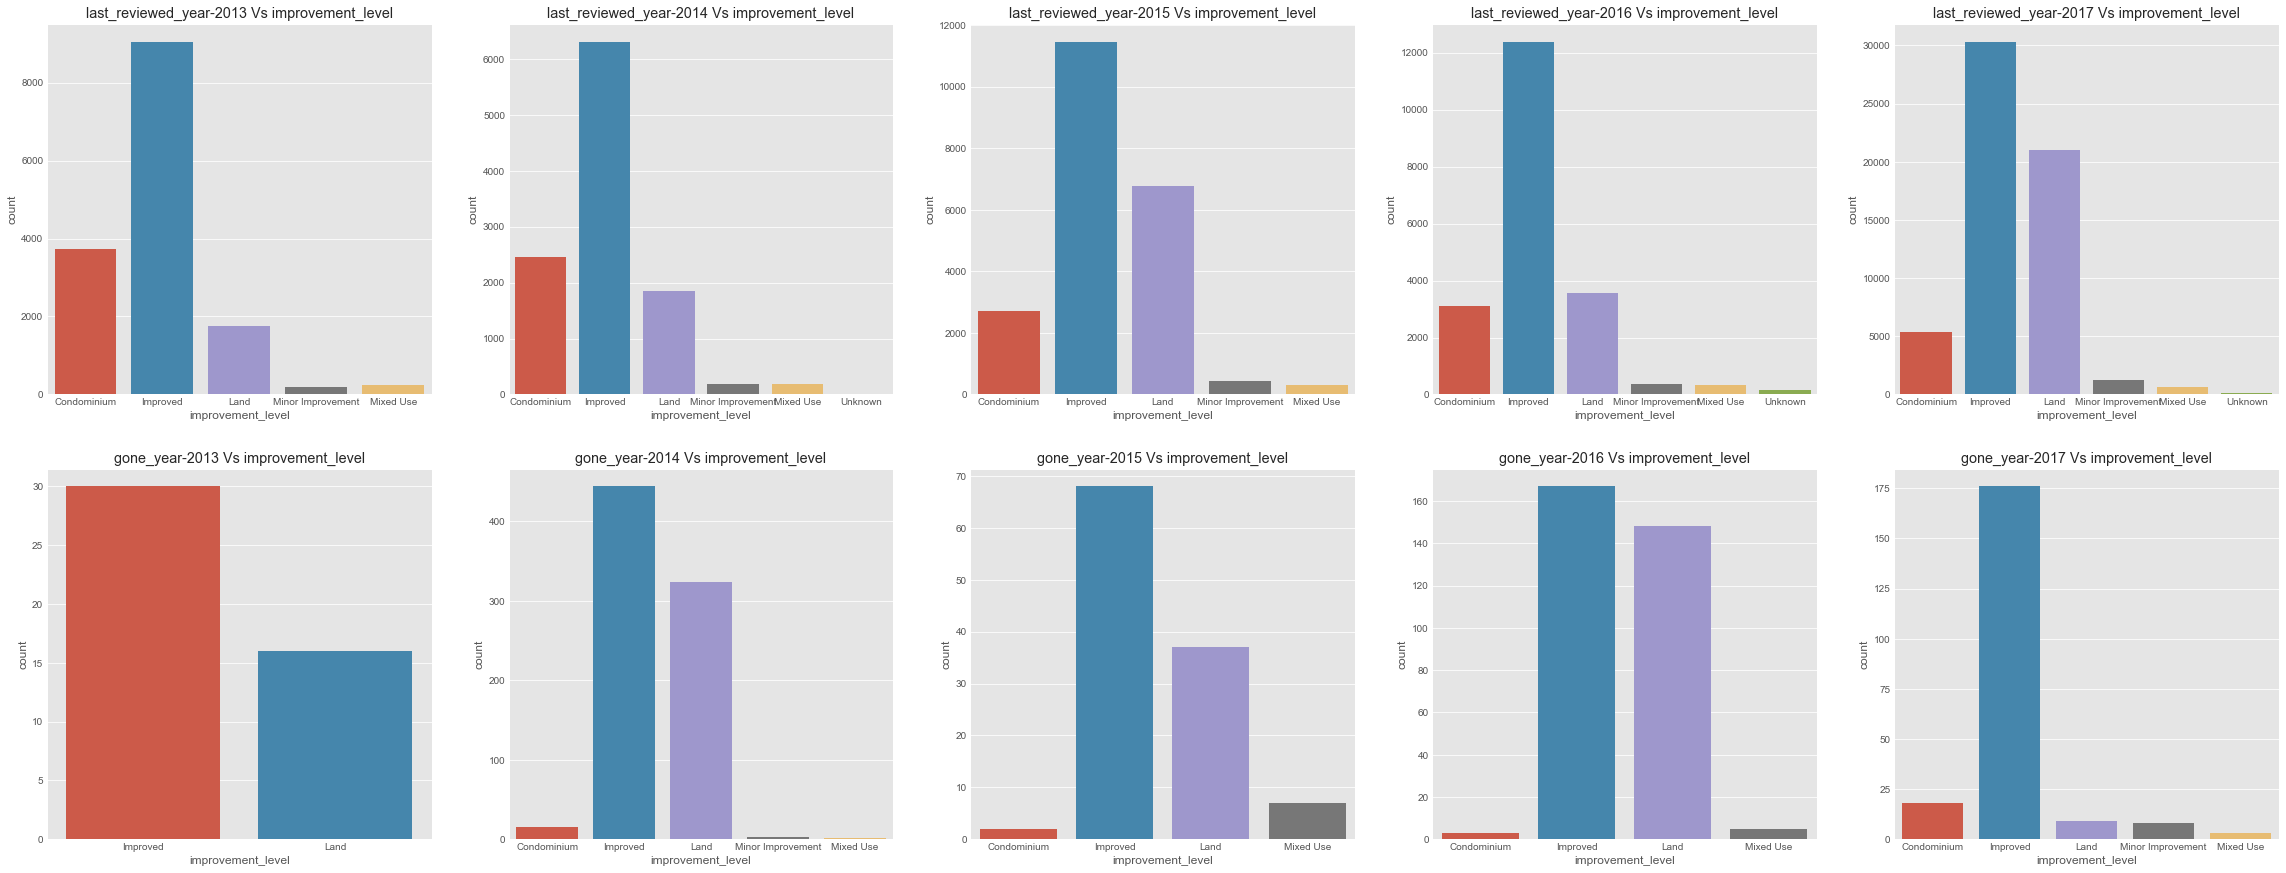

In [17]:
years = [2013, 2014, 2015, 2016, 2017]
f, axs = plt.subplots(2,5,figsize=(40,15))
axs = axs.ravel()

for num, yr in enumerate(years):
    df = last_reviewed_timestamp_not_null[last_reviewed_timestamp_not_null['last_reviewed_timestamp_year'] == yr].groupby(last_reviewed_timestamp_not_null['improvement_level']).size().rename('count').reset_index()
    p = sns.barplot(x="improvement_level", y="count", data=df, ax =axs[num])
    p.set_title('last_reviewed_year-%s Vs improvement_level'%(str(yr)))
    
for num, yr in enumerate(years):
    df = gone_timestamp_not_null[gone_timestamp_not_null['gone_timestamp_year'] == yr].groupby(gone_timestamp_not_null['improvement_level']).size().rename('count').reset_index()
    p = sns.barplot(x="improvement_level", y="count", data=df, ax =axs[num+5])
    p.set_title('gone_year-%s Vs improvement_level'%(str(yr)))

# MISLABELED ANALYSIS:

### THEORY:
* It seems that the randomly selected mislabeled data (19 each label) have NaT as the gone_timestamp column.
* But 5 of misclasified land images and all 19 of misclassified house images have a valid last_reviewed_date.

#### What to do: 
* It is a good idea to plot the mislabeled data Vs the last_reviewed date. If the date are old say 2013 or 2014 or 2015 then there is a high chance that the house might have been removed or vice-a-versa. 
* However, if the last_reviewed_timestamp is near say 2017 then there should be a high probability that the data is mislabeled

In [18]:
should_be_land = ['02-08-104-013-0000',
'02-16-205-014-0000',
'02-21-223-017-0000',
'02-24-406-082-0000',
'02-24-406-084-0000',
'02-29-400-002-0000',
'03-02-414-001-0000',
'03-02-414-002-0000',
'03-02-414-004-0000',
'03-02-414-005-0000',
'04-09-412-027-0000',
'05-31-321-002-0000',
'06-07-409-085-0000',
'06-13-401-041-0000',
'08-10-302-054-0000',
'04-33-302-047-0000',
'02-25-201-006-0000',
'03-02-316-051-0000',
'05-07-108-036-0000']

should_be_house = ['01-03-300-010-0000',
'01-04-100-008-0000',
'01-04-401-012-0000',
'01-04-403-016-0000',
'01-06-300-025-0000',
'01-06-402-001-0000',
'01-07-402-009-0000',
'01-09-400-006-0000',
'01-11-201-007-0000',
'01-16-100-008-0000',
'02-02-100-019-0000',
'02-06-200-026-0000',
'02-16-100-011-0000',
'01-11-201-013-0000',
'01-15-201-009-0000',
'02-12-213-001-1142',
'01-12-107-008-0000',
'02-02-400-019-0000',
'02-09-108-004-0000']

In [19]:
print ('mislabeled land in metadata: ', sum(metadata['pin'].isin(should_be_land)))
print ('mislabeled house in metadata: ', sum(metadata['pin'].isin(should_be_house)))

mislabeled land in metadata:  19
mislabeled house in metadata:  19


In [20]:
print ('mislabeled land where gone_timestamp has a valid date: ', sum(gone_timestamp_not_null['pin'].isin(should_be_land)))
print ('mislabeled house where gone_timestamp has a valid date: ', sum(gone_timestamp_not_null['pin'].isin(should_be_house)))

mislabeled land where gone_timestamp has a valid date:  0
mislabeled house where gone_timestamp has a valid date:  0


In [21]:
print ('mislabeled land where last_reviewed_timestamp has a valid date: ', sum(last_reviewed_timestamp_not_null['pin'].isin(should_be_land)))
print ('mislabeled house where last_reviewed_timestamp has a valid date: ', sum(last_reviewed_timestamp_not_null['pin'].isin(should_be_house)))

mislabeled land where last_reviewed_timestamp has a valid date:  5
mislabeled house where last_reviewed_timestamp has a valid date:  19


## ========= PLOT Mislabeled data Vs last_reviewed_date plot

In [22]:
mislabeled_land = last_reviewed_timestamp_not_null[last_reviewed_timestamp_not_null['pin'].isin(should_be_land)]
mislabeled_house = last_reviewed_timestamp_not_null[last_reviewed_timestamp_not_null['pin'].isin(should_be_house)]
print (mislabeled_land.shape)
mislabeled_land.head()

(5, 20)


,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo,last_reviewed_timestamp_year,last_reviewed_timestamp_month
806,806,0,500714,IL,Cook,02-24-406-082-0000,0 OUTLOT,nan,ARLINGTON HEIGHTS,nan,Vacant,Land,nan,nan,2017-06-22,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...,2017,6
808,808,0,500716,IL,Cook,02-24-406-084-0000,0 OUTLOT,nan,ARLINGTON HEIGHTS,nan,Vacant,Land,nan,nan,2017-06-22,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...,2017,6
810,810,0,500718,IL,Cook,02-25-201-006-0000,0 E NORTHWEST HWY,nan,PALATINE,nan,Vacant,Land,nan,nan,2017-06-22,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...,2017,6
985,985,0,500910,IL,Cook,03-02-316-051-0000,408W DUNDEE RD,nan,WHEELING,nan,Vacant,Land,nan,nan,2017-03-25,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...,2017,3
3117,3117,0,503237,IL,Cook,06-13-401-041-0000,1508 S GREENMEADOWS BLVD,nan,STREAMWOOD,601070000.0,Vacant,Land,nan,nan,2017-06-19,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...,2017,6


Text(0.5,1,'mislabeled_house Vs year')

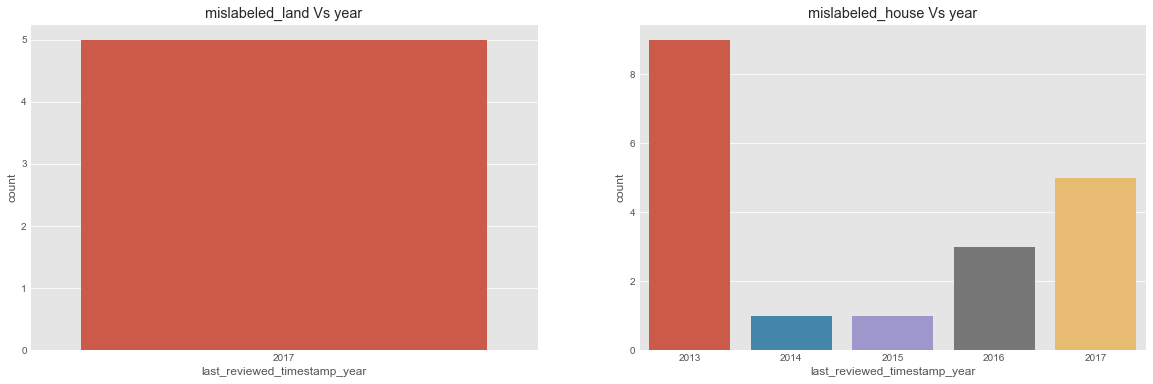

In [23]:
f, axs = plt.subplots(1, 2, figsize=(20,6))

p = sns.barplot(x ='last_reviewed_timestamp_year', y='count', data=mislabeled_land.groupby('last_reviewed_timestamp_year').size().rename('count').reset_index(), ax = axs[0])
p.set_title('mislabeled_land Vs year')

p = sns.barplot(x ='last_reviewed_timestamp_year', y='count', data=mislabeled_house.groupby('last_reviewed_timestamp_year').size().rename('count').reset_index(), ax = axs[1])
p.set_title('mislabeled_house Vs year')

## ====== Plot mislabeled images (both land and house) just as a sanity check if they are correct

In [25]:
# mislabeled_land_images_path = [os.path.join(land_images_path, path) for path in os.listdir(land_images_path) if str(path.split('_')[0]) in should_be_land]#np.array(mislabeled_land['pin'])]
# mislabeled_house_images_path = [os.path.join(house_images_path, path) for path in os.listdir(house_images_path) if str(path.split('_')[0]) in should_be_house]#np.array(mislabeled_house['pin'])]
# print (len(mislabeled_land_images_path), len(mislabeled_house_images_path))

In [26]:
# new_style = {'grid': False}
# matplotlib.rc('axes', **new_style)

# def vizualize(imageArray, title_arr, rows, columns, figsize=(40, 6)):
#     fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='y', edgecolor='k')
#     if columns>1:
#         axs = axs.ravel()
#     for no, image in enumerate(imageArray):
#         axs[no].imshow(image)
#         axs[no].set_title(title_arr[no])
        
# ml_image_arr = []
# ml_pin = []
# mh_image_arr = []
# mh_pin = []
# for image_path in mislabeled_land_images_path:# + mislabeled_house_images_path:
#     ml_pin.append(os.path.basename(image_path).split('_')[0])
#     image = cv2.imread(image_path)
#     image = misc.imresize(image, [180,180])
#     ml_image_arr.append(image)

# for image_path in mislabeled_house_images_path:
#     mh_pin.append(os.path.basename(image_path).split('_')[0])
#     image = cv2.imread(image_path)
#     image = misc.imresize(image, [180,180])
#     mh_image_arr.append(image)

In [27]:
# vizualize(ml_image_arr, title_arr=ml_pin, rows=2, columns=10, figsize=(40, 10))

In [28]:
# vizualize(mh_image_arr, title_arr=mh_pin, rows=2, columns=10, figsize=(40, 10))

## Get Subset of the data with to process with the network

In [29]:
print ('Images with valid last_reviewed_timestamp: ', len(last_reviewed_timestamp_not_null))
print ('Images with valid gone_timestamp: ', len(gone_timestamp_not_null))

Images with valid last_reviewed_timestamp:  126389
Images with valid gone_timestamp:  1492


In [30]:
metadata_lst_rvd_valid = metadata[metadata['last_reviewed_timestamp'] != '']
metadata_lst_rvd_valid['last_reviewed_timestamp'] = pd.to_datetime(metadata_lst_rvd_valid['last_reviewed_timestamp'])
metadata_lst_rvd_valid_2017 = metadata_lst_rvd_valid[((metadata_lst_rvd_valid['last_reviewed_timestamp'].dt.year == 2017) & 
                                                     (metadata_lst_rvd_valid['last_reviewed_timestamp'].dt.month >=7 ) &
                                                      (metadata_lst_rvd_valid['address_line1'] != 'nan') &
                                                      (metadata_lst_rvd_valid['assessor_photo'] != 'nan') &
                                                     (metadata_lst_rvd_valid['indicator'].isin(["Likely House", "Likely Land"]) ))]
metadata_lst_rvd_valid_2017.to_csv('/Users/sam/All-Program/App-DataSet/HouseClassification/metadata_last_reviewed_2017_+sept.csv', index = None)

/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
print (metadata_lst_rvd_valid_2017.shape)
metadata_lst_rvd_valid_2017.head()

(6080, 18)


,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
493,493,0,500372,IL,Cook,02-12-300-116-0000,1188 N. CHESAPEAKE LANE,nan,PALATINE,60074.0,Residential,Improved,Townhouse,nan,2017-10-18,,Likely House,http://www.cookcountyassessor.com/PropertyImag...
2230,2230,0,502281,IL,Cook,04-16-404-018-0000,2136 SECOND ST,nan,NORTHBROOK,600626620.0,Vacant,Land,nan,nan,2017-07-06,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
3731,3731,0,503918,IL,Cook,06-36-307-008-0000,5052 ELM AVE,nan,HANOVER PARK,601330000.0,Residential,Land,nan,nan,2017-07-06,,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
5086,5086,0,505343,IL,Cook,08-15-402-025-1062,1115 E ALGONQUIN RD,UNIT 2,ARLINGTON HEIGHTS,nan,Residential,Condominium,nan,nan,2017-07-10,,Likely House,http://www.cookcountyassessor.com/PropertyImag...
5106,5106,0,505371,IL,Cook,08-22-200-166-0000,1226 LYNN CT,nan,MOUNT PROSPECT,nan,Residential,Improved,Townhouse,Brick,2017-07-06,,Likely House,http://www.cookcountyassessor.com/PropertyImag...


# ROUGH
--------------

## Get labels for old/not_correct IMAGE Data

In [10]:
metadata[metadata['pin'].isin(should_be_land + should_be_house)]

,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
46,46,0,499899,IL,Cook,01-04-100-008-0000,375W COUNTY LINE RD,nan,BARRINGTON HILLS,60010.0,Residential,Improved,nan,nan,2017-02-22 14:51:14.377,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
49,49,0,499902,IL,Cook,01-04-401-012-0000,28 BRINKER RD,nan,BARRINGTON HILLS,60010.0,Residential,Improved,nan,nan,2013-08-01 00:00:00.000,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
55,55,0,499908,IL,Cook,01-09-400-006-0000,77 BRINKER RD,nan,BARRINGTON HILLS,600105112.0,Residential,Improved,nan,nan,2014-07-13 20:33:06.257,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
86,86,0,499946,IL,Cook,01-15-201-009-0000,120 HAWTHORNE RD,nan,BARRINGTON HILLS,600105304.0,Residential,Improved,Single Family,Brick,2017-02-10 21:21:30.520,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
88,88,0,499948,IL,Cook,01-16-100-008-0000,324 SUTTON RD,nan,BARRINGTON HILLS,60010.0,Residential,Improved,nan,nan,2013-08-01 00:00:00.000,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
253,253,0,500120,IL,Cook,02-02-100-019-0000,175E LAKE-COOK RD,nan,PALATINE,nan,Residential,Improved,nan,nan,2013-08-01 00:00:00.000,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
255,255,0,500127,IL,Cook,02-02-400-019-0000,1651 N HICKS RD,nan,PALATINE,600742330.0,Residential,Improved,Single Family,Frame,2017-02-10 21:21:30.520,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
305,305,0,500177,IL,Cook,02-06-200-026-0000,104 HOWE TER,nan,BARRINGTON,nan,Residential,Improved,nan,nan,2013-08-01 00:00:00.000,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...
314,314,0,500187,IL,Cook,02-08-104-013-0000,202 MARIE DR,nan,INVERNESS,nan,Residential,Land,nan,nan,NaT,NaT,Likely Land,http://www.cookcountyassessor.com/PropertyImag...
339,339,0,500212,IL,Cook,02-09-108-004-0000,1223W DUNDEE RD,nan,PALATINE,60074.0,Residential,Improved,nan,nan,2016-05-12 13:28:55.000,NaT,Likely House,http://www.cookcountyassessor.com/PropertyImag...


In [11]:
'02-16-205-014-0000' # Max Zoom required: Satelite image would be helpful (There is no proper streetline image)
'02-21-223-017-0000’
'02-24-406-082-0000' # The address says 0 OUTLOT (not a valid address), bing map cant find the house hence (these addresses are mostly land)
'02-24-406-084-0000' # Complicated because now the house is actually a parking lot

# https://msdn.microsoft.com/en-us/library/ff701724.aspx


,row_id,removed,property_id,state,county_name,pin,address_line1,address_line2,address_city,address_zip,zoning,improvement_level,type,exterior,last_reviewed_timestamp,gone_timestamp,indicator,assessor_photo
625,625,0,500522,IL,Cook,02-16-205-014-0000,766 N QUENTIN RD,nan,PALATINE,nan,Residential,Land,nan,nan,NaT,NaT,Likely Land,http://www.cookcountyassessor.com/PropertyImag...


In [51]:
https://dev.virtualearth.net/REST/v1/Imagery/Map/AerialWithLabels?pp=40.804000,-74.464460;;1&pp=40.815180,-74.219250;;2&pp=40.881210,-74.168020;;3&pp=40.810830,-74.260250;;4&pp=40.851800,-74.299900;;5&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
https://dev.virtualearth.net/REST/v1/Imagery/Map/imagerySet/centerPoint/zoomLevel?mapSize=mapSize&pushpin=pushpin&mapLayer=mapLayer&format=format&mapMetadata=mapMetadata&key=&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

# Bing Map
parent_url_awl = u'https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial'
query = u'?Seattle%20Center'
key = u'&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA'
pushpin = u'?pp=40.804000,-74.464460;;1&pp=40.815180,-74.219250;;2&pp=40.881210,-74.168020;;3&pp=40.810830,-74.260250;;4&pp=40.851800,-74.299900;;5&'

print (parent_url_awl + query + key)

# Using Address
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/eiffel%20tower?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

# Using LatLon
# 15 Zoom
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/47.619048,-122.35384/16?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
# 18 Zoom
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/47.619048,-122.35384/18?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

    
#241 E Dundee Rd, Wheeling: 42.13934, -87.91009
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/42.13934,-87.91009/20?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/241EDundeeRdWheeling/18?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

# 375W COUNTY LINE RD 
# Highlight Polygon Parcel, 20 zoom doesn't work, <=19 works
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/42.15286,-88.19863/19?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
    
#120 HAWTHORNE RD
https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/42.124492, -88.164316/19?mapSize=500,400&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
    
http://dev.virtualearth.net/REST/v1/Locations/US/adminDistrict/locality/addressLine?includeNeighborhood=includeNeighborhood&include=includeValue&maxResults=maxResults&key=BingMapsKey
    
    
# BING MAP: https://www.bingmapsportal.com/Account
# How to get Bing Map API
# https://msdn.microsoft.com/en-us/library/ff428642.aspx
# Application Name: Image Classification
#  As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

SyntaxError: invalid syntax (<ipython-input-51-90d3f291348e>, line 1)

In [ ]:
# USING BING WITH METADATA IMFO
https://dev.virtualearth.net/REST/V1/Imagery/Metadata/Aerial/42.15286,-88.1986?zl=19&o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
https://dev.virtualearth.net/REST/V1/Imagery/Metadata/Aerial/28%20brinker%20rd?zl=19&o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

# Using BING with Bird's Eye view
https://dev.virtualearth.net/REST/V1/Imagery/Metadata/Birdseye/47.23,-122.3&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

http://dev.virtualearth.net/REST/v1/Imagery/Metadata/US/WA/Redmond/1%20Microsoft%20Way?output=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
    
http://dev.virtualearth.net/REST/v1/Locations?locality=London&postalCode=SW1A?zl=19&o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
    
http://dev.virtualearth.net/REST/v1/Locations?addressLine=28%20brinker%20rd&postalCode=60010?zl=19&o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

http://dev.virtualearth.net/REST/v1/Locations/US/adminDistrict/postalCode/locality/addressLine?includeNeighborhood=includeNeighborhood&include=includeValue&maxResults=maxResults&key=BingMapsKey

    
#  Get Latitude and Longitude
http://dev.virtualearth.net/REST/v1/Locations/US/WA/Redmond/98052/1%20Microsoft%20Way?o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

In [107]:
import urllib
import requests
import logging

# from PIL import Image
# from StringIO import StringIO

# response = requests.get(url)
# img = Image.open(StringIO(response.content))


location_url = 'https://dev.virtualearth.net/REST/v1/Locations/'
aerial_url = 'https://dev.virtualearth.net/REST/v1/Imagery/Metadata/Aerial/'
bing_key = 'As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA'
tail = '&o=xml&key='+bing_key
path_out = '/Users/sam/All-Program/App-DataSet/HouseClassification/aerial_images'

import re


class BingSearch():
    def __init__(self, params):
        self.address_stack = []
        if country in params.keys():
            address_stack.append(re.sub(' ', '%20', country.strip()))

        if state in params.keys():
            address_stack.append(re.sub(' ', '%20', state.strip()))

        if locality in params.keys():
            address_stack.append(re.sub(' ', '%20', locality.strip()))

        if postal in params.keys():
            address_stack.append(re.sub(' ', '%20', postal.strip()))

        if address_line in params.keys():
            address_stack.append(re.sub(' ', '%20', address_line.strip()))
    
    def get_latlon(self):
        address_string = '/'.join([add for add in self.address_stack])
        lat = None
        lon = None
        pattern_lat  = re.compile('<Point><Latitude>(.+?)</Latitude>')
        pattern_lon  = re.compile('<Point>.*?<Longitude>(.+?)</Longitude>')
        fetch_url = location_url  + address_string + tail
        try:
            response = urllib.request.urlopen(url)
        except:
            logging.info('GET_ARTICLES: Fetching the Metadata from the URL')
        content = response.read()
        lat = re.findall(pattern_lat, str(content))[0]
        lon = re.findall(pattern_lon, str(content))[0]
        return lat, lon
    
    def get_aerial_image(self, lat, lon, zoom_level, path_out):
        url = aerial_url + '%s,%s'%(lat,lon) + '?zl=%s'%str(zoom_level) + tail
        pattern_lat  = re.compile('<ImageUrl>(.+?)</ImageUrl>')
        try:
            response = urllib.request.urlopen(url)
        except:
            logging.info('GET_ARTICLES: Fetching the Metadata from the URL')
        content = response.read()
        image_url = re.findall(pattern_lat, str(content))[0]
        img_data = requests.get(image_url).content
        
        with open(os.path.join(path_out, 'image_name.jpg'), 'wb') as handler:
            handler.write(img_data)
    
params = dict(country = 'US',
              state = 'WA',
              locality = 'Redmond',
              postal = '98052',
              address_line = '1 Microsoft Way')

obj_BS = BingSearch(params)
lat,lon = obj_BS.get_latlon()
print (lat, lon)
obj_BS.get_aerial_image(lat, lon, zoom_level = 20, path_out = path_out)
obj_BS.get_latlon()


47.6400493433086 -122.12979727784
http://ecn.t3.tiles.virtualearth.net/tiles/a02123003021223303313.jpeg?g=6293
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\

('47.6400493433086', '-122.12979727784')

In [87]:

http://dev.virtualearth.net/REST/v1/Imagery/Metadata/Aerial//47.6400493433086,-122.12979727784?zl=19?o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
https://dev.virtualearth.net/REST/V1/Imagery/Metadata/Aerial/42.15286,-88.1986?zl=19&o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
https://dev.virtualearth.net/REST/v1/Imagery/Metadata/Aerial/47.6400493433086,-122.12979727784?zl=19?o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?><Response xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://schemas.microsoft.com/search/local/ws/rest/v1"><Copyright>Copyright \xc2\xa9 2018 Microsoft and its suppliers. All rights reserved. This API cannot be accessed and the content and any results may not be used, reproduced or transmitted in any manner without express written permission from Microsoft Corporation.</Copyright><BrandLogoUri>http://dev.virtualearth.net/Branding/logo_powered_by.png</BrandLogoUri><StatusCode>200</StatusCode><StatusDescription>OK</StatusDescription><AuthenticationResultCode>ValidCredentials</AuthenticationResultCode><TraceId>d4c847a0d18f47a79d695bfa2c5ce0b3|CH1294622B|7.7.0.0|</TraceId><ResourceSets><ResourceSet><EstimatedTotal>1</EstimatedTotal><Resources><Location><Name>1 Microsoft Way, Redmond, WA 98052</Name><Point><Latitude>47.6400493433086</Latitude><Longitude>-122.12979727784</Longit

In [ ]:
http://dev.virtualearth.net/REST/v1/Locations/US/WA/Redmond/98052/1%20Microsoft%20Way?o=xml&key=As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA
http://dev.virtualearth.net/REST/v1/Locations/US/WA/Redmond/98052/1%20Microsoft%20Way?o=xml&As1SMhbktDgHnBoak6XDezSKFHbgjCqLW4CAVx2s2601KLW_y6cM6vk5qb2C-wFA